In [2]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown
import missingno as msno

In [3]:
df = pd.read_csv('/Users/kaitlinsinger/wa_notify/DEN_future/data_extraction/manipulated_data/simplified_wide_df_with_date_loc_imputed.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,source,pm_start_date,pm_end_date,pm_location,cases_assigned_count,cases_interviewed_count,cases_interviewed_perc,cases_named_contacts_count,...,quarantine_adherent_perc,staff_hired_ci_count,staff_hired_ci_per_health_dept_mean,staff_hired_count,staff_hired_ct_count,staff_hired_ct_per_health_dept_mean,user_cases_notifying,users_with_code,region,time_period
0,0,0,A Multifaceted Evaluation of a COVID-19 Contac...,2021-03-01,03/31/2021,King County,NaN,NaN,NaN,NaN,...,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T3
1,1,1,A Multifaceted Evaluation of a COVID-19 Contac...,2021-04-01,06/30/2020,King County,NaN,NaN,76.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T4
2,2,2,A Multifaceted Evaluation of a COVID-19 Contac...,2020-07-01,06/30/2021,King County,52317.0,42900.0,82.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T2
3,3,3,A Multifaceted Evaluation of a COVID-19 Contac...,2020-07-01,09/30/2020,King County,NaN,NaN,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T2
4,4,4,A Patient-Initiated Digital COVID-19 Contact N...,2020-05-18,08/17/2020,United States*,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,T2


In [36]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'source', 'pm_start_date', 'pm_end_date',
       'pm_location', 'cases_assigned_count', 'cases_interviewed_count',
       'cases_interviewed_perc', 'cases_named_contacts_count',
       'cases_not_assigned_count', 'cases_per_staff_month',
       'cases_positive_from_test_mean', 'cases_positive_from_test_med',
       'cases_reached_count', 'cases_reached_from_exposure_mean',
       'cases_reached_from_positive_max', 'cases_reached_from_positive_med',
       'cases_reached_from_symptom_mean', 'cases_reached_from_symptom_med',
       'cases_reached_from_test_mean', 'cases_reached_from_test_med',
       'cases_reached_perc', 'cases_were_contacts_count',
       'contacts_assigned_count', 'contacts_infected_count',
       'contacts_infected_perc', 'contacts_interviewed_count',
       'contacts_interviewed_perc', 'contacts_named_count',
       'contacts_named_count_household', 'contacts_named_perc',
       'contacts_named_perc_household', 'contacts_named_ra

In [37]:
cols_interest = [
       'source', 
       'pm_start_date', 'pm_end_date', 'time_period',
       'pm_location', 'region', 
       'cases_assigned_count', 'cases_interviewed_count',
       'cases_interviewed_perc', 'cases_named_contacts_count',
       'cases_not_assigned_count', 
        # 'cases_per_staff_month',
       'cases_positive_from_test_mean', 'cases_positive_from_test_med',
       'cases_reached_count', 'cases_reached_from_exposure_mean',
       'cases_reached_from_positive_max', 'cases_reached_from_positive_med',
       'cases_reached_from_symptom_mean', 'cases_reached_from_symptom_med',
       'cases_reached_from_test_mean', 'cases_reached_from_test_med',
       'cases_reached_perc', 
       'percent_naming_contacts',
       # 'cases_were_contacts_count',
       'contacts_assigned_count', 'contacts_infected_count',
       'contacts_infected_perc', 'contacts_interviewed_count',
       'contacts_interviewed_perc', 'contacts_named_count',
       'contacts_named_count_household',
       'contacts_named_perc_household', 'contacts_named_ratio_mean',
       'contacts_named_ratio_mean_cases_naming',
       'contacts_named_ratio_mean_household', 'contacts_named_ratio_med',
       'contacts_per_staff_month', 'contacts_reached_count',
       'contacts_reached_from_exposure_mean',
       'contacts_reached_from_exposure_med',
       'contacts_reached_from_named_mean', 'contacts_reached_from_named_med',
       'contacts_reached_from_symptom_med', 'contacts_reached_from_test_mean',
       'contacts_reached_from_test_med', 'contacts_reached_perc',
       'contacts_tested_count', 
       #  'hd_cases_interviewed_perc_hdcount',
       # 'hd_cases_interviewed_perc_mean', 'hd_cases_interviewed_perc_med',
       # 'hd_cases_positive_from_test_mean_hdcount',
       # 'hd_cases_positive_from_test_mean_mean',
       # 'hd_cases_positive_from_test_mean_med',
       # 'hd_cases_reached_from_test_mean_hdcount',
       # 'hd_cases_reached_from_test_mean_mean',
       # 'hd_cases_reached_from_test_mean_med',
       # 'hd_cases_was_contacts_perc_hdcount', 'hd_cases_was_contacts_perc_mean',
       # 'hd_cases_was_contacts_perc_med',
       # 'hd_contacts_named_ratio_mean_cases_naming_hdcount',
       # 'hd_contacts_named_ratio_mean_cases_naming_mean',
       # 'hd_contacts_named_ratio_mean_cases_naming_med',
       # 'hd_contacts_named_ratio_mean_hdcount',
       # 'hd_contacts_named_ratio_mean_mean', 'hd_contacts_named_ratio_mean_med',
       # 'hd_contacts_reached_from_named_mean_hdcount',
       # 'hd_contacts_reached_from_named_mean_mean',
       # 'hd_contacts_reached_from_named_mean_med',
       # 'hd_contacts_reached_perc_hdcount', 'hd_contacts_reached_perc_mean',
       # 'hd_contacts_reached_perc_med',
       # 'hd_contacts_test_from_notified_hdcount',
       # 'hd_contacts_test_from_notified_mean',
       # 'hd_contacts_test_from_notified_med',
       # 'hd_percent_naming_contcts_hdcount', 'hd_percent_naming_contcts_mean',
       # 'hd_percent_naming_contcts_med', 
       'hr_hours', 'monetary_cost',
       'notifications_sent_count', 'num_users_count', 'num_users_upper_bound',
        'quarantine_adherent_perc',
       'staff_hired_ci_count', 'staff_hired_ci_per_health_dept_mean',
       'staff_hired_count', 'staff_hired_ct_count',
       'staff_hired_ct_per_health_dept_mean', 'user_cases_notifying',
       'users_with_code', 
       'ratio_cases_contacts_intv']

In [7]:
# fuzzy columns


In [38]:
df['ratio_cases_contacts_intv'] = df['cases_interviewed_count']/df['contacts_interviewed_count']

In [41]:
# data profiling
df[cols_interest].describe()

,cases_assigned_count,cases_interviewed_count,cases_interviewed_perc,cases_named_contacts_count,cases_not_assigned_count,cases_positive_from_test_mean,cases_positive_from_test_med,cases_reached_count,cases_reached_from_exposure_mean,cases_reached_from_positive_max,...,percent_naming_contacts,quarantine_adherent_perc,staff_hired_ci_count,staff_hired_ci_per_health_dept_mean,staff_hired_count,staff_hired_ct_count,staff_hired_ct_per_health_dept_mean,user_cases_notifying,users_with_code,ratio_cases_contacts_intv
count,5.700000e+01,5.200000e+01,51.000000,4.700000e+01,6.000000,2.000000,11.000000,15.000000,4.000000,1.0,...,49.000000,1.0,14.000000,14.000000,4.000000,14.00000,14.000000,2.000000,2.000000,13.000000
mean,8.424133e+05,3.862469e+05,69.288824,1.895171e+05,17199.000000,40.670000,48.000000,148739.200000,165.900000,24.0,...,52.036735,81.0,37499.500000,714.428571,1215.500000,35464.00000,664.285714,72521.500000,261789.500000,3.604419
std,1.640675e+06,6.766037e+05,34.550558,3.219684e+05,28680.839081,38.169624,15.178933,263515.808696,7.090839,NaN,...,21.180928,NaN,10845.303441,202.581689,869.038357,12265.24458,229.232978,6243.045771,261422.326752,5.958107
min,4.000000e+01,4.000000e+01,26.610000,4.000000e+01,18.000000,13.680000,24.000000,959.000000,156.000000,24.0,...,14.000000,81.0,26288.000000,487.000000,600.000000,22292.00000,425.000000,68107.000000,76936.000000,0.561793
25%,4.987000e+03,3.400500e+03,48.375000,6.805000e+02,2777.000000,27.175000,48.000000,4839.500000,164.100000,24.0,...,40.040000,81.0,28847.750000,562.000000,750.000000,24107.00000,458.000000,70314.250000,169362.750000,1.113771
50%,1.410600e+04,8.675500e+03,70.650000,2.890000e+03,5896.500000,40.670000,48.000000,24973.000000,167.400000,24.0,...,47.200000,81.0,32354.500000,628.000000,881.000000,31645.00000,586.000000,72521.500000,261789.500000,1.588116
75%,9.410350e+05,5.670642e+05,82.350000,3.426345e+05,12556.750000,54.165000,48.000000,103052.500000,169.200000,24.0,...,63.240000,81.0,45323.250000,855.000000,1346.500000,45371.25000,852.000000,74728.750000,354216.250000,1.863993
max,6.078802e+06,2.681000e+06,263.650000,1.214861e+06,74869.000000,67.660000,72.000000,840922.000000,172.800000,24.0,...,100.000000,81.0,54651.000000,1072.000000,2500.000000,54905.00000,1077.000000,76936.000000,446643.000000,22.525481


<AxesSubplot:>

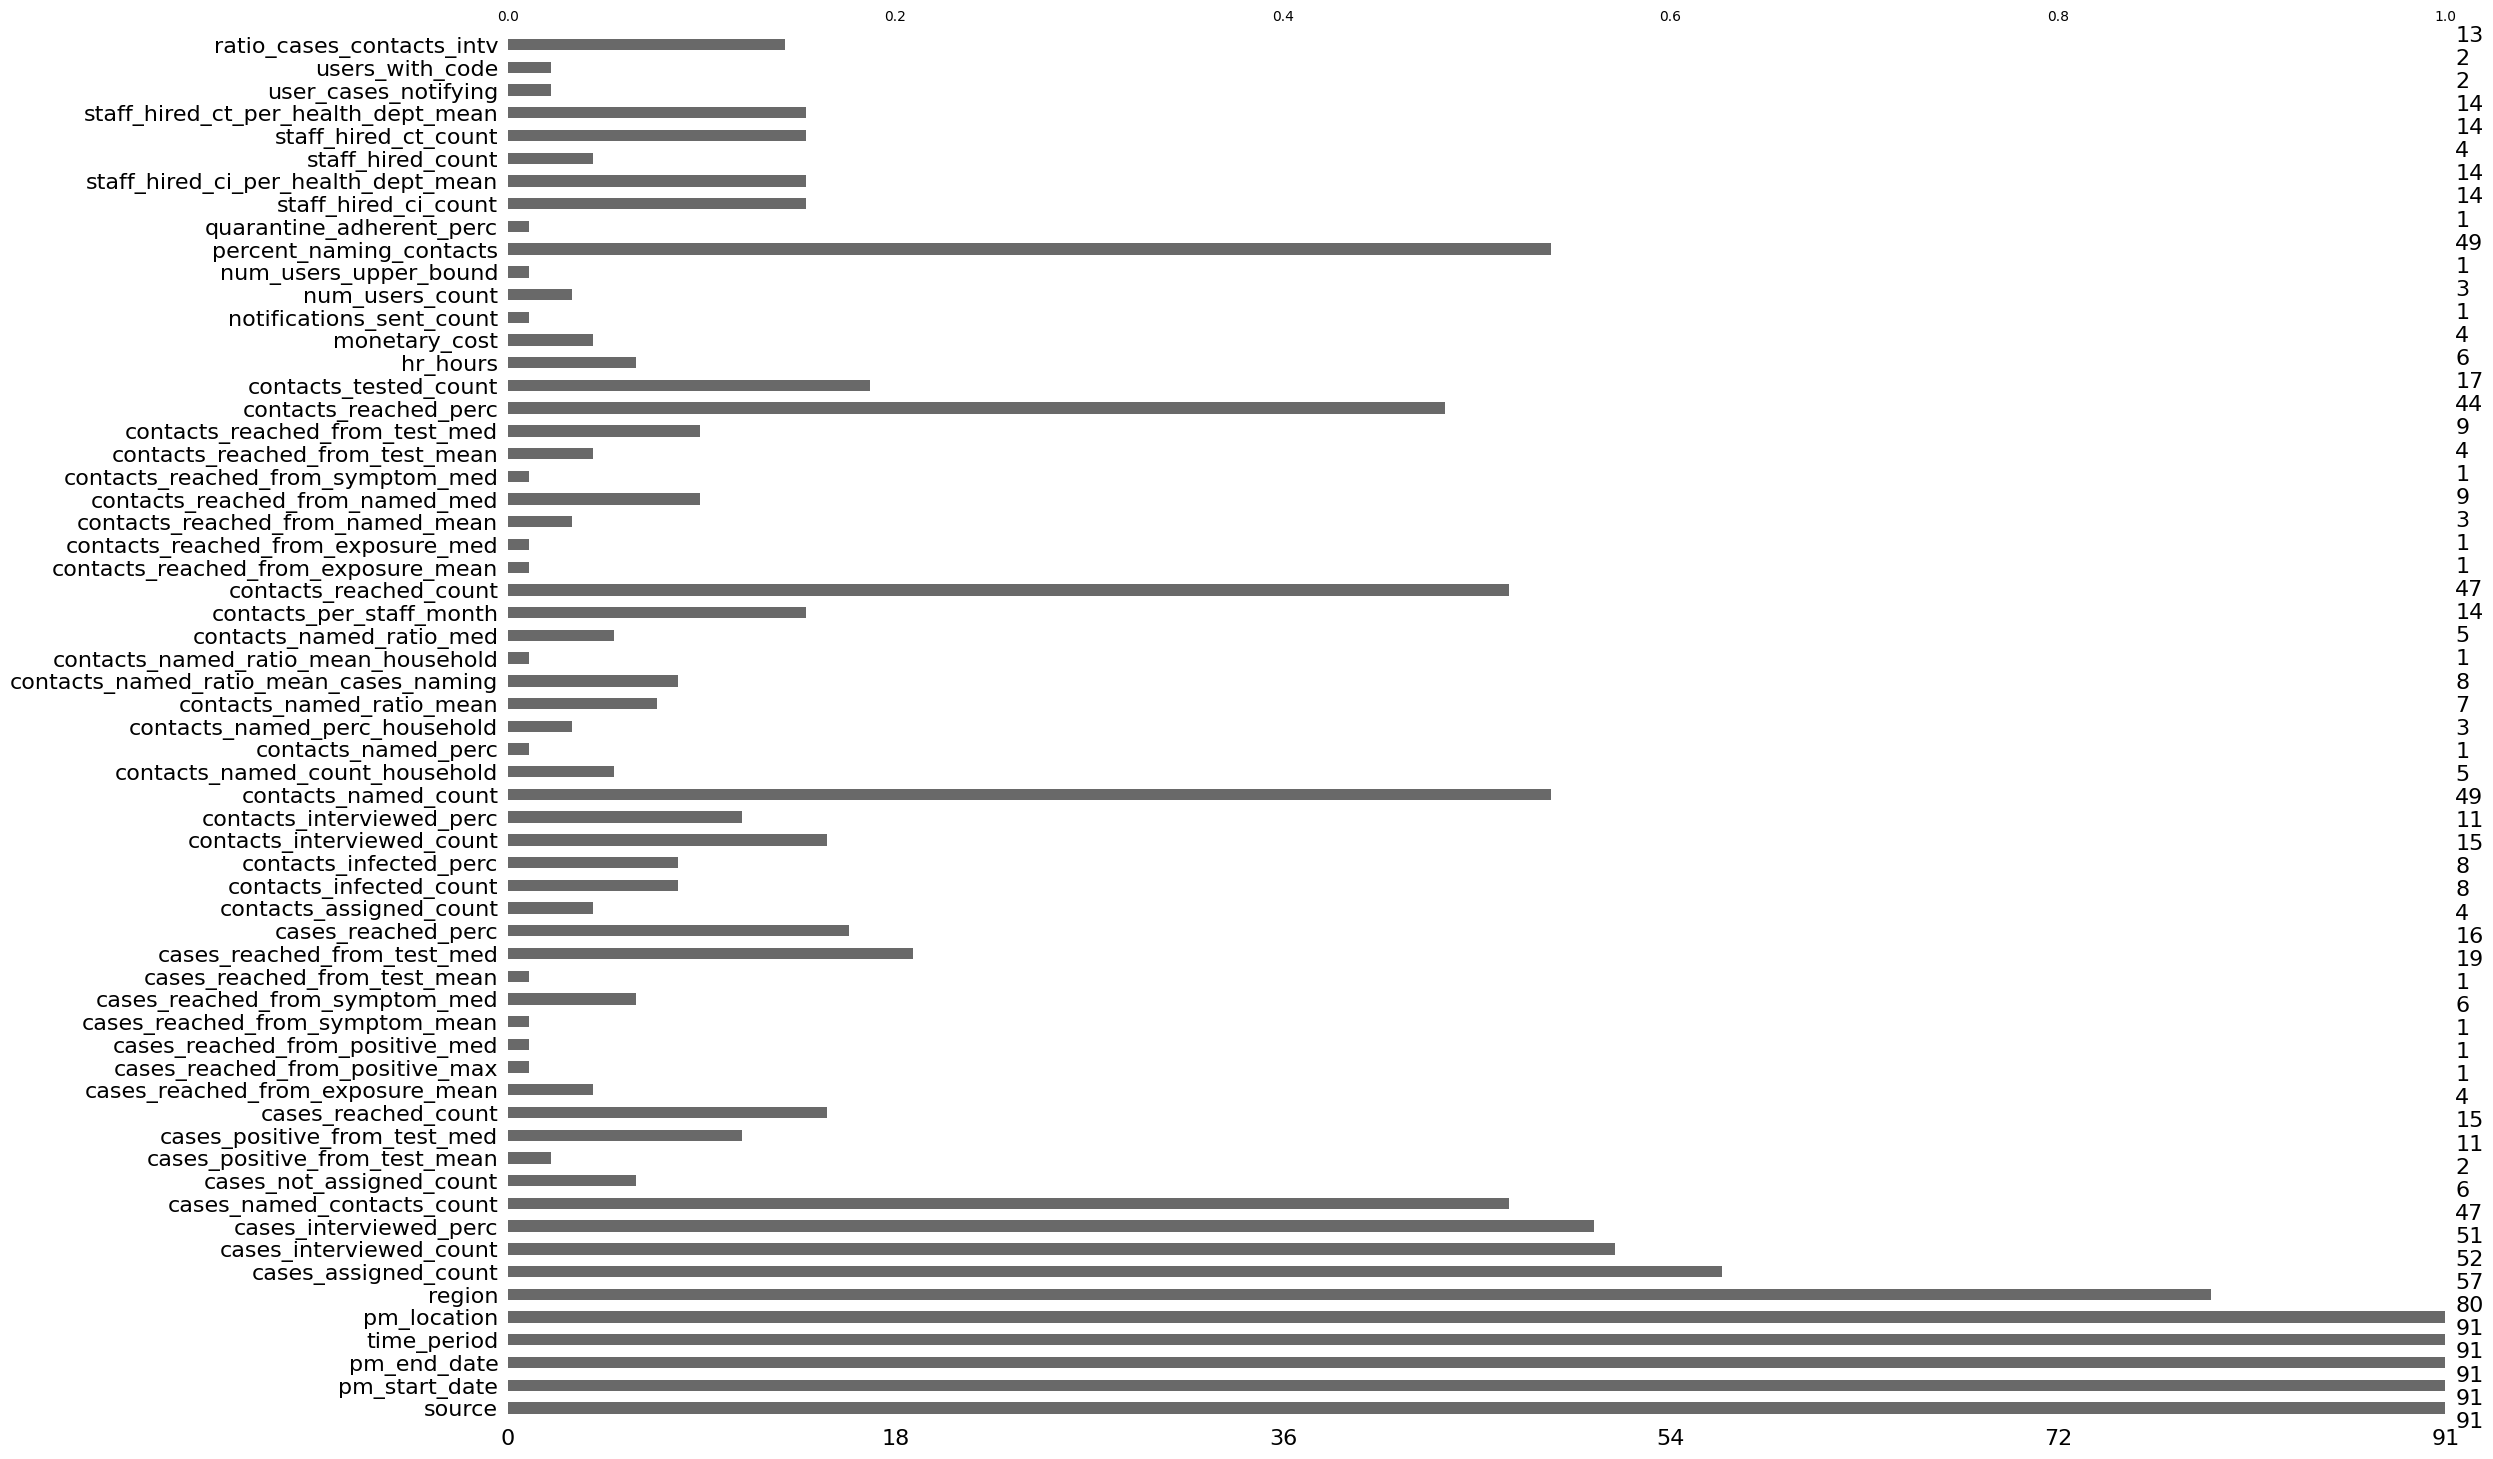

In [42]:
# missingness map
#msno.matrix(df[cols_interest], labels=True, label_rotation=90)
#plt.show()
msno.bar(df[cols_interest])

In [11]:
# data analysis

In [12]:
alt.Chart(df).mark_tick().encode(
    alt.X('cases_assigned_count:Q')
)

alt.Chart(...)

In [13]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_assigned_count:Q",  scale=alt.Scale(type='log')),
    alt.Y("source:N")
)

alt.Chart(...)

In [14]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_count:Q",  scale=alt.Scale(type='log')),
    alt.Y("source:N")
)

alt.Chart(...)

In [15]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_perc:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [16]:
alt.Chart(df).mark_point().encode(
    alt.X("ratio_cases_contacts_intv:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [17]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_perc:Q"),
    alt.Y("region:N")
)

alt.Chart(...)

In [18]:
alt.Chart(df).mark_point().encode(
    alt.X("time_period:O"),
    alt.Y("cases_interviewed_perc:Q"),
    alt.Size("cases_assigned_count:Q", ),
    #alt.Color("region:N"),
    tooltip = [
        alt.Tooltip("source:N"),
        alt.Tooltip("pm_start_date:T"),
        alt.Tooltip("pm_end_date:T")
   ]
).properties(
    width=500
)

alt.Chart(...)

In [35]:
alt.Chart(df).mark_bar().encode(
    alt.X("ratio_cases_contacts_intv:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [43]:
brush = alt.selection_interval(
    encodings=['x'] # limit selection to x-axis (year) values
)

# dynamic query histogram
years = alt.Chart(df).mark_bar().add_params(
    brush
).encode(
    x=alt.X('pm_start_date:T', title='Sum cases assigned by start month'),
    y=alt.Y('sum(cases_assigned_count):Q', title=None)
).properties(
    width=650,
    height=50
)
chart = alt.Chart(df).mark_point().encode(
    alt.X("region:N"),
    alt.Y("cases_interviewed_perc:Q"),
    alt.Size("cases_assigned_count:Q", ),
    #alt.Color("region:N"),
    tooltip = [
        alt.Tooltip("source:N"),
        alt.Tooltip("pm_start_date:T"),
        alt.Tooltip("pm_end_date:T")
   ],
   opacity=alt.condition(brush, alt.value(0.75), alt.value(0.05))
).properties(
    width=500
)

alt.vconcat(years, chart).properties(spacing=5)

alt.VConcatChart(...)